<a href="https://colab.research.google.com/github/nimblenitin/Deep-Learning-course-on-One-Fourth-Labs/blob/master/0207_MorePythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'File2.txt'})
uploaded.SetContentString('Hello world')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1Ywtt1zpGYak3NZko4_5gy-IZW5D8LPdn


In [0]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned-1549119762886.csv, id 1EGR8kzAoBzXA4-ysm-3qUyl3RX87sXav


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1EGR8kzAoBzXA4-ysm-3qUyl3RX87sXav'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,12,55,155.0,250,1.3,10.5,5,2.0,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.0,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
0,1,55,132.0,300,1.3,10.6,5,0.3,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.0,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
0,9,55,142.0,329,1.5,8.5,5,2.0,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
0,8,55,152.0,385,1.3,8.0,5,2.0,3,5.0,15,3,0,0,147.5,26,3,5799,19

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [0]:
!ls

 adc.json		    my_first_file_output.txt   sample_data
 mobile_cleaned		    nitin.jpeg		       test.csv
 mobile_cleaned_local.csv   ofl.png		      'url?sa=i'


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('mobile_cleaned_local.csv')

In [0]:
df.head()

sim_type  aperture  gpu_rank  weight  stand_by_time  processor_frequency  \
0         0        12        55   155.0            250                  1.3   
1         0         1        55   132.0            300                  1.3   
2         0         9        55   142.0            329                  1.5   
3         0         8        55   152.0            385                  1.3   
4         1         1        55   234.0            385                  1.3   

   thickness  flash_type  front_camera_resolution  auto_focus    ...     \
0       10.5           5                     2.00           0    ...      
1       10.6           5                     0.30           1    ...      
2        8.5           5                     2.00           3    ...      
3        8.0           5                     2.00           3    ...      
4        7.9           5                     1.92           3    ...      

   micro_sd_slot  screen_pixel_density  water_proof_rate  phone_width  \
0              4                     2                 3         67.8   
1              4                     4                 6         64.0   
2              4                     9                 6         72.0   
3              4                     1                 3         75.1   
4              4                     1                 6         91.0   

   expandable_memory  version  usb_type  battery_capacity  processor_rank  \
0               64.0        5         3              2000             125   
1               32.0        5         3              2000             165   
2               32.0        6         3              2500             164   
3               32.0        6         3              3000             165   
4               32.0        6         3              3000             165   

   is_liked  
0         1  
1         1  
2         0  
3         1  
4         0  

[5 rows x 40 columns]

In [0]:
df.tail()

sim_type  aperture  gpu_rank  weight  stand_by_time  processor_frequency  \
104         3        10        14   192.0            540                  1.8   
105         0         5         3   157.0            400                  2.3   
106         3        10         6   192.0            384                  1.8   
107         3        10        12   129.0            250                  1.4   
108         2         8         3   158.0            400                  2.2   

     thickness  flash_type  front_camera_resolution  auto_focus    ...     \
104        9.4           2                      2.0           2    ...      
105        7.7           5                      5.0           3    ...      
106        7.3           2                      5.0           3    ...      
107        6.9           2                      1.2           3    ...      
108        7.4           6                      8.0           3    ...      

     micro_sd_slot  screen_pixel_density  water_proof_rate  phone_width  \
104              4                    29                 6         77.2   
105              6                    27                 1         72.6   
106              1                    16                 6         77.9   
107              1                    13                 6         67.0   
108              5                    16                 6         74.7   

     expandable_memory  version  usb_type  battery_capacity  processor_rank  \
104              256.0        6         3              3410               8   
105              200.0        9         3              3600             101   
106                0.0       14        13              2750               1   
107                0.0       12        13              1810               7   
108                0.0       10        12              3000               2   

     is_liked  
104         1  
105         1  
106         1  
107         1  
108         0  

[5 rows x 40 columns]

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df)

['FM',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloord

In [0]:
len(df)

109

In [0]:
df.shape

(109, 40)

In [0]:
df.loc[5]

sim_type                                0.0
aperture                               14.0
gpu_rank                               55.0
weight                                179.0
stand_by_time                         280.0
processor_frequency                     1.3
thickness                               7.9
flash_type                              5.0
front_camera_resolution                 5.0
auto_focus                              3.0
screen_size                             5.5
frames_per_second                      30.0
FM                                      3.0
no_of_reviews_in_gsmarena_in_week       6.0
os                                      0.0
phone_height                          150.0
screen_protection                       5.0
sim_size                                3.0
price                                5999.0
talk_time                              22.0
video_resolution                      720.0
display_resolution                      0.0
removable_battery               

In [0]:
df_short = df[23:29]

In [0]:
df_short.shape

(6, 40)

In [0]:
df_short.head()

sim_type  aperture  gpu_rank  weight  stand_by_time  processor_frequency  \
23         3         1        43    97.0            345                  1.2   
24         0        10        29   150.0            322                  1.5   
25         0         8        43   202.0            914                  1.2   
26         0         8        43   170.0            456                  1.2   
27         0         8        38   155.0            350                  1.3   

    thickness  flash_type  front_camera_resolution  auto_focus    ...     \
23        5.1           5                      5.0           3    ...      
24        8.2           5                      5.0           3    ...      
25       10.6           2                      5.0           3    ...      
26       10.8           2                      5.0           3    ...      
27        9.3           5                      5.0           3    ...      

    micro_sd_slot  screen_pixel_density  water_proof_rate  phone_width  \
23              2                    10                 2         68.1   
24              6                    23                 6         71.0   
25              6                     7                 6         77.5   
26              4                     7                 6         77.2   
27              6                     7                 6         77.0   

    expandable_memory  version  usb_type  battery_capacity  processor_rank  \
23                0.0        5         3              2000              94   
24               32.0        6         4              2750              21   
25               64.0        5         4              5000              94   
26              128.0        5         3              3000              94   
27               64.0        6         4              3000              19   

    is_liked  
23         1  
24         1  
25         1  
26         1  
27         1  

[5 rows x 40 columns]

In [0]:
df_thin = df[['stand_by_time', 'expandable_memory', 'price', 'battery_capacity', 'is_liked']]

In [0]:
df_thin.shape

(109, 5)

In [0]:
df_thin.head()

stand_by_time  expandable_memory  price  battery_capacity  is_liked
0            250               64.0   3870              2000         1
1            300               32.0   4059              2000         1
2            329               32.0   4777              2500         0
3            385               32.0   5799              3000         1
4            385               32.0   5990              3000         0

In [0]:
df_liked = df_thin[df_thin['is_liked'] == 1]

In [0]:
df_liked.shape

(92, 5)

In [0]:
df_thin.describe()

stand_by_time  expandable_memory         price  battery_capacity  \
count      109.00000         109.000000    109.000000        109.000000   
mean       404.66055         104.513761  19373.211009       2841.779817   
std        176.44206         275.799767  14039.197220        655.003963   
min        160.00000           0.000000   3870.000000       1560.000000   
25%        264.00000           0.000000   8999.000000       2470.000000   
50%        360.00000          32.000000  14614.000000       2900.000000   
75%        500.00000         128.000000  24999.000000       3100.000000   
max       1093.00000        2048.000000  64500.000000       5000.000000   

         is_liked  
count  109.000000  
mean     0.844037  
std      0.364496  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [0]:
df_thin[df_thin['is_liked'] == ]['price'].mean()

SyntaxError: ignored

In [0]:
g = df_thin.groupby(['is_liked'])

In [0]:
  for key, df_key in g:
    print(key)
    print(df_key)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

In [0]:
df_thin.groupby(['is_liked']).describe()

battery_capacity                                                   \
                    count         mean         std     min     25%     50%   
is_liked                                                                     
0                    17.0  2874.941176  591.777035  1624.0  2600.0  2900.0   
1                    92.0  2835.652174  668.850998  1560.0  2457.5  2900.0   

                         expandable_memory               ...       price  \
             75%     max             count        mean   ...         75%   
is_liked                                                 ...               
0         3000.0  4100.0              17.0   68.235294   ...    25500.00   
1         3100.0  5000.0              92.0  111.217391   ...    24924.75   

                  stand_by_time                                                \
              max         count        mean         std    min     25%    50%   
is_liked                                                                        
0         37766.0          17.0  457.235294  157.094927  240.0  345.00  400.0   
1         64500.0          92.0  394.945652  178.876246  160.0  258.25  354.0   

                         
            75%     max  
is_liked                 
0         580.0   840.0  
1         482.0  1093.0  

[2 rows x 32 columns]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

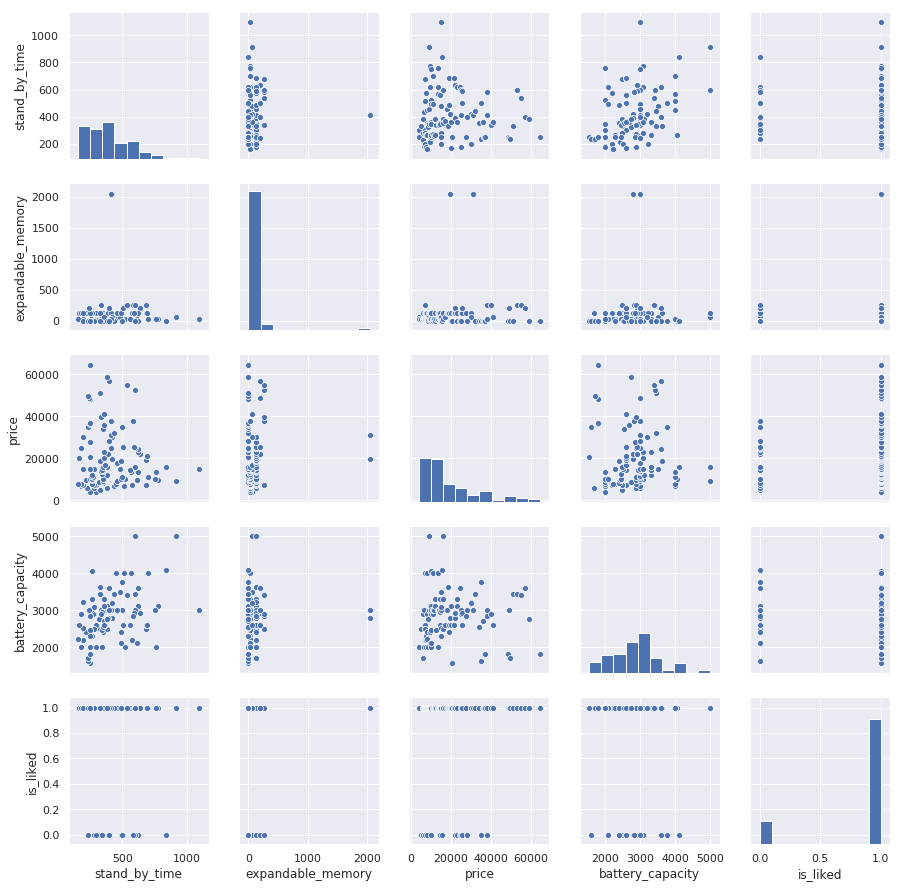

In [0]:
ax = sns.pairplot(df_thin, diag_kind= 'hist')

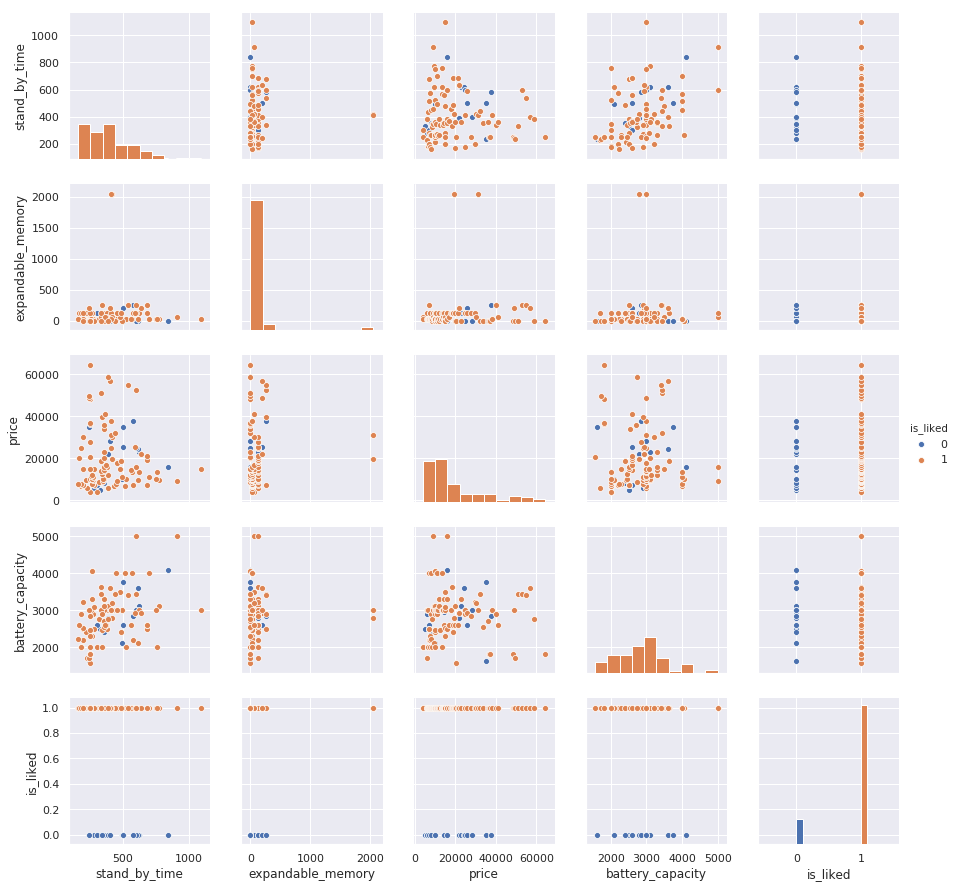

In [0]:
ax = sns.pairplot(df_thin, diag_kind = 'hist', hue = 'is_liked')

# Debugging

In [0]:
def factorial(x):
  if (x == 0):
    return 1
  return x * factorial(x-1)

In [0]:
factorial(4)

24

In [0]:
def code_to_debug():
  # import pdb; pdb.set_trace()
  import random
  
  for i in range(10):
    x = random.random()
    factorial(x)

In [0]:
%xmode Verbose

Exception reporting mode: Verbose


In [0]:
code_to_debug()

RecursionError: ignored

In [0]:
def factorial_debugged(x):
  if (not isinstance(x, int)):
     print('This method only supports integer')
     return -1
  if (x == 0):
    return 1
  return x * factorial(x-1)

In [0]:
def code_to_debug():
  import pdb; pdb.set_trace()
  import random
  
  for i in range(10):
    x = random.random()
    factorial_debugged(x)

In [0]:
code_to_debug()

> <ipython-input-42-7a37d284ce1e>(3)code_to_debug()
-> import random
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) c
This method only supports integer
This method only supports integer
This method only supports integer
This method only supports integer
This method only supports integer
This method only supports integer
This me